In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_predict

In [5]:
from sklearn.metrics import mean_absolute_error

In [6]:
from scipy.signal import savgol_filter

In [7]:
from sys import stdout
 

In [4]:
"""/*
# Define PLS object
pls = PLSRegression(n_components=5)
 
# Fit
pls.fit(X, Y)
 
# Cross-validation
y_cv = cross_val_predict(pls, X, y, cv=10)
 
# Calculate scores
score = r2_score(y, y_cv)
mse = mean_squared_error(y, y_cv)
"""

'/*\n# Define PLS object\npls = PLSRegression(n_components=5)\n \n# Fit\npls.fit(X, Y)\n \n# Cross-validation\ny_cv = cross_val_predict(pls, X, y, cv=10)\n \n# Calculate scores\nscore = r2_score(y, y_cv)\nmse = mean_squared_error(y, y_cv)\n'

In [160]:
data = pd.read_csv("updated_dataset_for_cdom.csv")

In [161]:
data.head()

,cdom,wvl_400,wvl_406.060606060606,wvl_412.121212121212,wvl_418.181818181818,wvl_424.242424242424,wvl_430.30303030303,wvl_436.363636363636,wvl_442.424242424242,wvl_448.484848484848,...,wvl_945.454545454545,wvl_951.515151515151,wvl_957.575757575757,wvl_963.636363636363,wvl_969.696969696969,wvl_975.757575757575,wvl_981.818181818181,wvl_987.878787878787,wvl_993.939393939393,wvl_1000
0,0.000,0.056314,0.064316,0.067075,0.064996,0.060689,0.055129,0.047608,0.036917,0.027884,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08
1,0.005,0.023801,0.026113,0.027362,0.027621,0.027302,0.026501,0.024850,0.021576,0.018119,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08
2,0.010,0.014293,0.015436,0.016184,0.016562,0.016713,0.016650,0.016175,0.014827,0.013179,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08
3,0.015,0.010014,0.010721,0.011235,0.011571,0.011795,0.011908,0.011792,0.011151,0.010262,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08
4,0.020,0.007640,0.008134,0.008519,0.008803,0.009026,0.009184,0.009201,0.008876,0.008360,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 101 entries, cdom to wvl_1000
dtypes: float64(101)
memory usage: 157.9 KB


In [163]:
data.columns

Index(['cdom', 'wvl_400', 'wvl_406.060606060606', 'wvl_412.121212121212',
       'wvl_418.181818181818', 'wvl_424.242424242424', 'wvl_430.30303030303',
       'wvl_436.363636363636', 'wvl_442.424242424242', 'wvl_448.484848484848',
       ...
       'wvl_945.454545454545', 'wvl_951.515151515151', 'wvl_957.575757575757',
       'wvl_963.636363636363', 'wvl_969.696969696969', 'wvl_975.757575757575',
       'wvl_981.818181818181', 'wvl_987.878787878787', 'wvl_993.939393939393',
       'wvl_1000'],
      dtype='object', length=101)

In [164]:
type(data)

pandas.core.frame.DataFrame

In [165]:
type(data['cdom'])

pandas.core.series.Series

In [166]:
ind = ['cdom']
for i in range(0,100):
    temp = "var" + str(i+1)
    ind.append(temp)
ind[0:5]

['cdom', 'var1', 'var2', 'var3', 'var4']

In [167]:
data.columns = ind

In [168]:
data.head(2)

,cdom,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var91,var92,var93,var94,var95,var96,var97,var98,var99,var100
0,0.000,0.056314,0.064316,0.067075,0.064996,0.060689,0.055129,0.047608,0.036917,0.027884,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08
1,0.005,0.023801,0.026113,0.027362,0.027621,0.027302,0.026501,0.024850,0.021576,0.018119,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08


In [169]:
y = data['cdom']

In [170]:
y.head(2)

0    0.000
1    0.005
Name: cdom, dtype: float64

In [171]:
X = data.drop('cdom' ,  axis = 1 )

In [172]:
X.head(2)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var91,var92,var93,var94,var95,var96,var97,var98,var99,var100
0,0.056314,0.064316,0.067075,0.064996,0.060689,0.055129,0.047608,0.036917,0.027884,0.024030,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08
1,0.023801,0.026113,0.027362,0.027621,0.027302,0.026501,0.024850,0.021576,0.018119,0.016521,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08


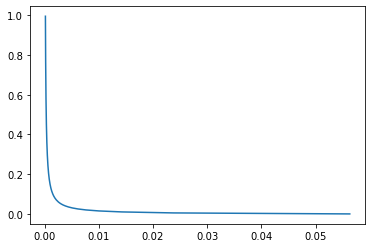

In [173]:
plt.plot(X["var1"],y)

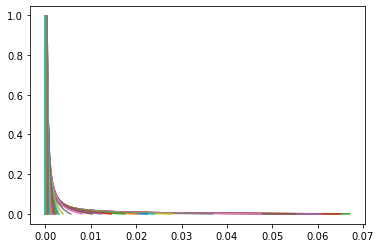

In [174]:
for i in range(100):
    temp = "var"+str(i+1)
    plt.plot(X[temp],y)

In [175]:
# using second derivative 

In [176]:
x_temp = savgol_filter(X,21,polyorder = 2 , deriv = 2)

In [177]:
type(x_temp)

numpy.ndarray

In [178]:
x_temp

array([[ 1.93576063e-04,  1.93576063e-04,  1.93576063e-04, ...,
         2.55041457e-09,  2.55041457e-09,  2.55041457e-09],
       [-5.45828824e-05, -5.45828824e-05, -5.45828824e-05, ...,
         2.55041457e-09,  2.55041457e-09,  2.55041457e-09],
       [-8.19487315e-05, -8.19487315e-05, -8.19487315e-05, ...,
         2.55041457e-09,  2.55041457e-09,  2.55041457e-09],
       ...,
       [ 2.31785390e-07,  2.31785390e-07,  2.31785390e-07, ...,
         2.55041457e-09,  2.55041457e-09,  2.55041457e-09],
       [ 2.32596352e-07,  2.32596352e-07,  2.32596352e-07, ...,
         2.55041457e-09,  2.55041457e-09,  2.55041457e-09],
       [ 2.33381693e-07,  2.33381693e-07,  2.33381693e-07, ...,
         2.55041457e-09,  2.55041457e-09,  2.55041457e-09]])

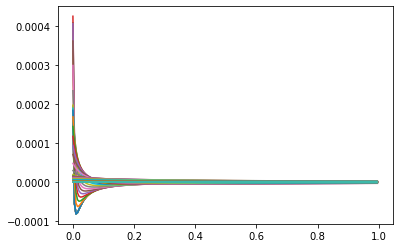

In [179]:
plt.plot(y,x_temp)
plt.show()

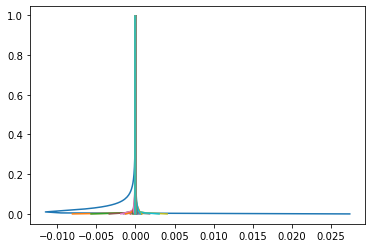

In [180]:
x_temp2 = savgol_filter(X,21,polyorder = 13 , deriv = 2)
plt.plot(x_temp2,y)
plt.show()

In [ ]:
# for real data set

In [181]:
def optimised_pls(X,y,n_comp):
    
    mse = []
    
    component = np.arange(1,n_comp)
    
    for i in component :
        
        pls = PLSRegression(n_components = i )
        
        # cross validation
        y_cv = cross_val_predict(pls, X, y, cv = 10)
        
        mse.append(mean_squared_error(y , y_cv))
        
    comp_for_msemin = 1
    msemin = min(mse)
    for i in range(n_comp):
        
        if (mse[i] == msemin):
            comp_for_msemin = i+1
            break
    print("Suggested number of components  : " , comp_for_msemin)
    
    plt.plot(component , np.array(mse) , marker = 'o', ms = 5, color = 'blue' , mfc = "blue")
    plt.plot(comp_for_msemin, msemin , marker = 's',color = "red", ms = 10 )
    plt.show()    
        
    return comp_for_msemin

Suggested number of components  :  12


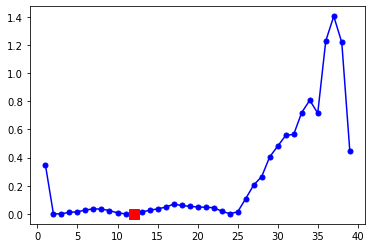

12

In [182]:
optimised_pls(X,y,40)

Suggested number of components  :  12


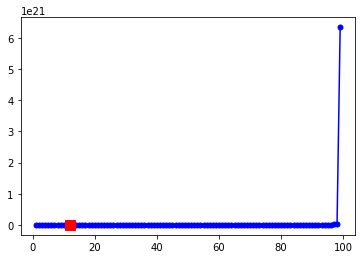

In [183]:
optimum_comp = optimised_pls(X,y,100)

In [184]:
# pls with optimal components
pls_opt = PLSRegression(n_components = optimum_comp)

pls_opt.fit(X,y)
y_c = pls_opt.predict(X)
y_cv = cross_val_predict(pls_opt , X,y, cv = 10)

score_c = r2_score(y,y_c)
score_cv = r2_score(y,y_cv)

mse_c = mean_squared_error(y,y_c)
mse_cv = mean_squared_error(y,y_cv)

print("y_c is " , y_c[0:5])
print("y_cv is " , y_cv[0:5]) 


y_c is  [[ 0.0022672 ]
 [-0.00070133]
 [ 0.00659024]
 [ 0.01675672]
 [ 0.02124536]]
y_cv is  [[-0.2392558 ]
 [-0.03163192]
 [ 0.01712659]
 [ 0.03541056]
 [ 0.04109037]]


In [185]:
print("score_c is " , score_c)
print("score_cv is " , score_cv)

score_c is  0.9999521347320958
score_cv is  0.9959365894998643


In [186]:
print("mse_c is " , mse_c)
print("mse_cv is " , mse_cv)

mse_c is  3.988672606043183e-06
mse_cv is  0.00033860907623943693


In [187]:
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

print(rangey , rangex)

0.995 [0.99325201]


In [188]:
z = np.polyfit(y , y_c , 1) 

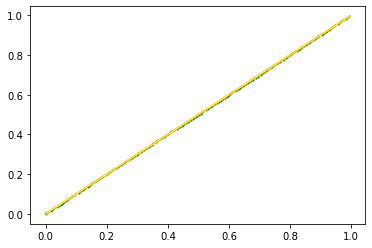

In [189]:
plt.scatter(y_c , y , s = 1 , c = 'green')
plt.plot(np.polyval(z,y) ,y , c= 'red' )
plt.plot(y,y,c='yellow')

In [190]:
len(y)

200

In [191]:
print(y_c[0:5])
print(y[0:5])

[[ 0.0022672 ]
 [-0.00070133]
 [ 0.00659024]
 [ 0.01675672]
 [ 0.02124536]]
0    0.000
1    0.005
2    0.010
3    0.015
4    0.020
Name: cdom, dtype: float64


In [192]:
y_c[1][0]

-0.0007013259255562176

In [193]:
abs_error = 0 
for i in range(200):
    abs_error += abs(y[i]-y_c[i][0])
abs_error/=200

In [194]:
print(abs_error)

0.0015978700389806628


Suggested number of components  :  17


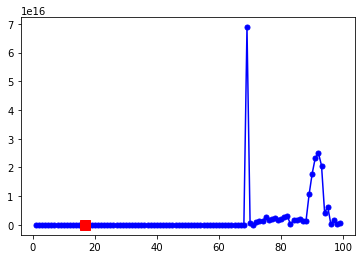

In [195]:
optimum_comp_filter = optimised_pls(x_temp,y,100)       # components change 

In [197]:
x2 = savgol_filter(X,17,polyorder = 2 , deriv = 2)

Suggested number of components  :  14


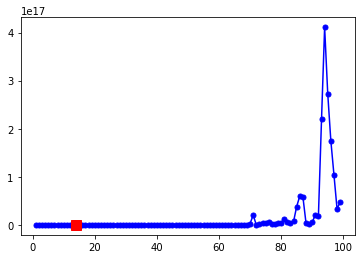

In [198]:
optimum_filter = optimised_pls(x2,y,100)

In [202]:
# using filter
def optimised_fil(X,y,n_comp):
    
    mse = []
    
    component = np.arange(1,n_comp)
    
    for i in component :
        
        pls = PLSRegression(n_components = i )
        
        # cross validation
        y_cv = cross_val_predict(pls, X, y, cv = 10)
        
        mse.append(mean_squared_error(y , y_cv))
        
    comp_for_msemin = 1
    msemin = min(mse)
    for i in range(n_comp):
        
        if (mse[i] == msemin):
            comp_for_msemin = i+1
            break
    print("Suggested number of components  : " , comp_for_msemin)

    pls_op = PLSRegression(n_components = comp_for_msemin)

    pls_op.fit(X,y)
    y_c = pls_op.predict(X)
    y_cv = cross_val_predict(pls_op, X,y, cv = 10)

    score_c = r2_score(y,y_c)
    score_cv = r2_score(y,y_cv)

    mse_c = mean_squared_error(y,y_c)
    mse_cv = mean_squared_error(y,y_cv)
    mae_c=mean_absolute_error(y,y_c)
    mae_cv=mean_absolute_error(y,y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
    print('MAE calib: %5.3f' % mae_c)
    print('MAE CV: %5.3f' % mae_cv)
    

In [203]:
optimised_fil(x2,y,50)

Suggested number of components  :  14
R2 calib: 1.000
R2 CV: 0.932
MSE calib: 0.000
MSE CV: 0.006
MAE calib: 0.001
MAE CV: 0.016


In [35]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
 
   
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
       
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/n_comp
       
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
   
    pls_opt = PLSRegression(n_components=msemin+1)
 
   
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
 
  
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
 
 
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
   
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    mae_c=mean_absolute_error(y,y_c)
    mae_cv=mean_absolute_error(y,y_cv)
 
    print('R2 calib: ' , score_c)
    print('R2 CV: '  ,score_cv)
    print('MAE calib: ',mae_c)
    print('MAE CV: ',mae_cv)
    print('MSE calib: ' ,  mse_c)
    print('MSE CV: ' , mse_cv)

 
    
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
 
   
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$cdom')
        plt.ylabel('Measured $^{\circ}$cdom')
 
        plt.show()
 
    return

In [8]:
new_data = pd.read_csv("graph_data_cdom.csv")

In [9]:
new_data.head()

,cdom_0.0,wvl_0.0,r_inf_test_0.0,cdom_0.005,wvl_0.005,r_inf_test_0.005,cdom_0.01,wvl_0.01,r_inf_test_0.01,cdom_0.015,...,r_inf_test_0.98,cdom_0.985,wvl_0.985,r_inf_test_0.985,cdom_0.99,wvl_0.99,r_inf_test_0.99,cdom_0.995,wvl_0.995,r_inf_test_0.995
0,0.0,400.000000,0.016449,0.005,400.000000,0.015117,0.01,400.000000,0.013970,0.015,...,0.000779,0.985,400.000000,0.000775,0.99,400.000000,0.000772,0.995,400.000000,0.000768
1,0.0,406.060606,0.017710,0.005,406.060606,0.016311,0.01,406.060606,0.015102,0.015,...,0.000853,0.985,406.060606,0.000849,0.99,406.060606,0.000844,0.995,406.060606,0.000840
2,0.0,412.121212,0.018952,0.005,412.121212,0.017501,0.01,412.121212,0.016241,0.015,...,0.000934,0.985,412.121212,0.000929,0.99,412.121212,0.000925,0.995,412.121212,0.000920
3,0.0,418.181818,0.020187,0.005,418.181818,0.018697,0.01,418.181818,0.017395,0.015,...,0.001023,0.985,418.181818,0.001018,0.99,418.181818,0.001013,0.995,418.181818,0.001008
4,0.0,424.242424,0.021450,0.005,424.242424,0.019927,0.01,424.242424,0.018589,0.015,...,0.001122,0.985,424.242424,0.001117,0.99,424.242424,0.001111,0.995,424.242424,0.001106


In [26]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 600 entries, cdom_0.0 to r_inf_test_0.995
dtypes: float64(600)
memory usage: 468.9 KB


In [16]:

data1 = pd.DataFrame()

new_col = []
i=0
for column in new_data : 
    
    i+=1 
    
    if(i%3==0):
        
        data1 = pd.concat([data1 , new_data[column]] , axis=1)
        
    elif i%3==1 :
        new_col.append(new_data[column][1])
        

In [17]:
new_col

[0.0,
 0.005,
 0.01,
 0.015,
 0.02,
 0.025,
 0.03,
 0.035,
 0.04,
 0.045,
 0.05,
 0.055,
 0.06,
 0.065,
 0.07,
 0.075,
 0.08,
 0.085,
 0.09,
 0.095,
 0.1,
 0.105,
 0.11,
 0.115,
 0.12,
 0.125,
 0.13,
 0.135,
 0.14,
 0.145,
 0.15,
 0.155,
 0.16,
 0.165,
 0.17,
 0.175,
 0.18,
 0.185,
 0.19,
 0.195,
 0.2,
 0.205,
 0.21,
 0.215,
 0.22,
 0.225,
 0.23,
 0.235,
 0.24,
 0.245,
 0.25,
 0.255,
 0.26,
 0.265,
 0.27,
 0.275,
 0.28,
 0.285,
 0.29,
 0.295,
 0.3,
 0.305,
 0.31,
 0.315,
 0.32,
 0.325,
 0.33,
 0.335,
 0.34,
 0.345,
 0.35,
 0.355,
 0.36,
 0.365,
 0.37,
 0.375,
 0.38,
 0.385,
 0.39,
 0.395,
 0.4,
 0.405,
 0.41,
 0.415,
 0.42,
 0.425,
 0.43,
 0.435,
 0.44,
 0.445,
 0.45,
 0.455,
 0.46,
 0.465,
 0.47,
 0.475,
 0.48,
 0.485,
 0.49,
 0.495,
 0.5,
 0.505,
 0.51,
 0.515,
 0.52,
 0.525,
 0.53,
 0.535,
 0.54,
 0.545,
 0.55,
 0.555,
 0.56,
 0.5650000000000001,
 0.5700000000000001,
 0.5750000000000001,
 0.58,
 0.585,
 0.59,
 0.595,
 0.6,
 0.605,
 0.61,
 0.615,
 0.62,
 0.625,
 0.63,
 0.635,
 0.64,


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Columns: 200 entries, r_inf_test_0.0 to r_inf_test_0.995
dtypes: float64(200)
memory usage: 157.0+ KB


In [22]:
len(new_col)

200

In [23]:
data1 = data1.T

In [24]:
data1

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
r_inf_test_0.0,0.016449,0.017710,0.018952,0.020187,0.021450,0.022738,0.023989,0.025014,0.025880,0.027078,...,0.000009,0.000008,0.000007,0.000006,0.000006,0.000005,0.000005,0.000004,0.000004,0.000004
r_inf_test_0.005,0.015117,0.016311,0.017501,0.018697,0.019927,0.021190,0.022430,0.023477,0.024387,0.025600,...,0.000009,0.000008,0.000007,0.000006,0.000006,0.000005,0.000005,0.000004,0.000004,0.000004
r_inf_test_0.01,0.013970,0.015102,0.016241,0.017395,0.018589,0.019822,0.021043,0.022101,0.023041,0.024259,...,0.000009,0.000008,0.000007,0.000006,0.000006,0.000005,0.000005,0.000004,0.000004,0.000004
r_inf_test_0.015,0.012974,0.014048,0.015137,0.016249,0.017405,0.018605,0.019804,0.020864,0.021822,0.023039,...,0.000009,0.000008,0.000007,0.000006,0.000006,0.000005,0.000005,0.000004,0.000004,0.000004
r_inf_test_0.02,0.012102,0.013123,0.014164,0.015234,0.016352,0.017518,0.018691,0.019746,0.020715,0.021925,...,0.000009,0.000008,0.000007,0.000006,0.000006,0.000005,0.000005,0.000004,0.000004,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r_inf_test_0.975,0.000783,0.000857,0.000939,0.001029,0.001128,0.001238,0.001359,0.001492,0.001637,0.001800,...,0.000009,0.000008,0.000007,0.000006,0.000006,0.000005,0.000005,0.000004,0.000004,0.000004
r_inf_test_0.98,0.000779,0.000853,0.000934,0.001023,0.001122,0.001232,0.001352,0.001484,0.001629,0.001791,...,0.000009,0.000008,0.000007,0.000006,0.000006,0.000005,0.000005,0.000004,0.000004,0.000004
r_inf_test_0.985,0.000775,0.000849,0.000929,0.001018,0.001117,0.001225,0.001345,0.001477,0.001621,0.001782,...,0.000009,0.000008,0.000007,0.000006,0.000006,0.000005,0.000005,0.000004,0.000004,0.000004
r_inf_test_0.99,0.000772,0.000844,0.000925,0.001013,0.001111,0.001219,0.001339,0.001470,0.001613,0.001773,...,0.000009,0.000008,0.000007,0.000006,0.000006,0.000005,0.000005,0.000004,0.000004,0.000004




Choosen tsm value is  1e-06
100% completed
Suggested number of components:  27



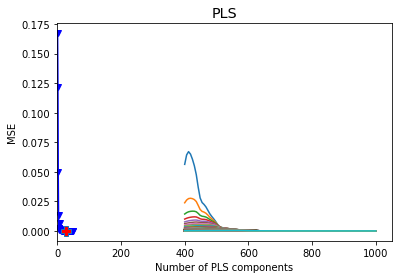

R2 calib:  1.0
R2 CV:  0.9999909131773677
MAE calib:  1.6473186096460646e-13
MAE CV:  7.829324009193169e-05
MSE calib:  4.1987491863672606e-26
MSE CV:  7.572162884858393e-07


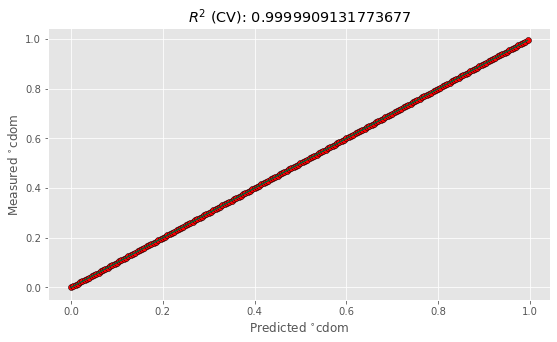



Choosen tsm value is  4.9999999999999996e-06
100% completed
Suggested number of components:  28



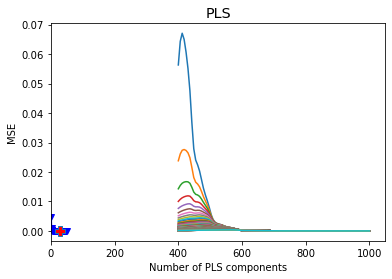

R2 calib:  1.0
R2 CV:  1.0
MAE calib:  7.343557749742157e-13
MAE CV:  6.066284363726026e-11
MSE calib:  8.351806402095213e-25
MSE CV:  1.2117968794730291e-19


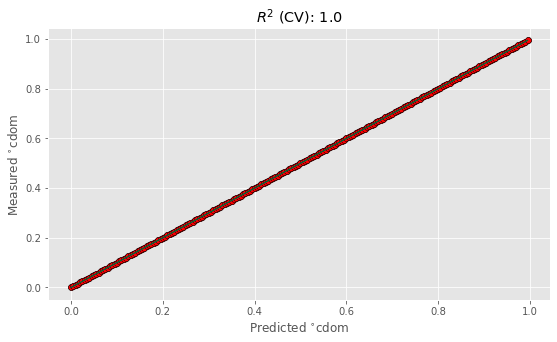



Choosen tsm value is  2.4999999999999998e-05
100% completed
Suggested number of components:  49



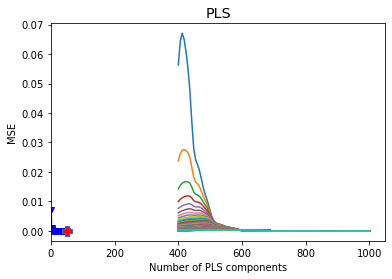

R2 calib:  1.0
R2 CV:  1.0
MAE calib:  6.009908065998659e-13
MAE CV:  1.4291189542534056e-12
MSE calib:  5.742495405153982e-25
MSE CV:  4.515076619933354e-24


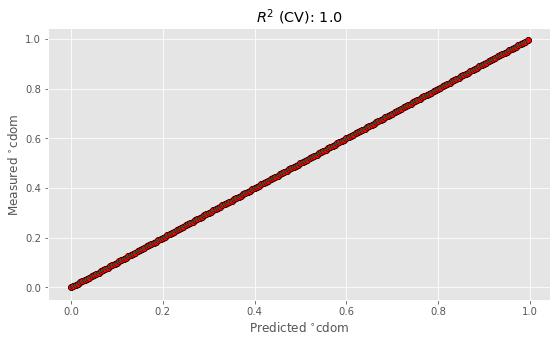



Choosen tsm value is  0.000125
100% completed
Suggested number of components:  48



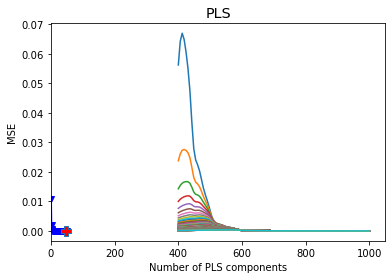

R2 calib:  1.0
R2 CV:  1.0
MAE calib:  1.2171694229769214e-12
MAE CV:  9.676517009546415e-12
MSE calib:  2.2693808850071292e-24
MSE CV:  5.10194491769692e-22


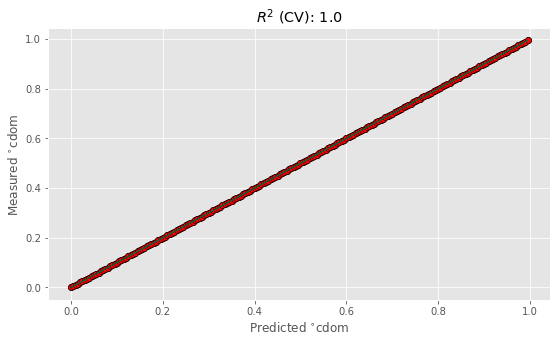



Choosen tsm value is  0.000625
100% completed
Suggested number of components:  49



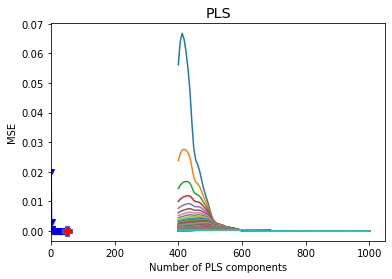

R2 calib:  1.0
R2 CV:  1.0
MAE calib:  3.2187669639013872e-12
MAE CV:  8.762391901385308e-11
MSE calib:  1.6329512099735386e-23
MSE CV:  5.801062483483892e-20


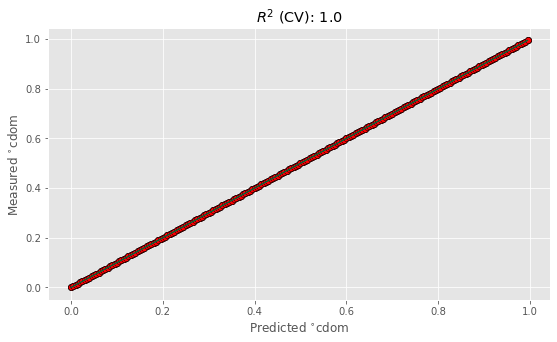



Choosen tsm value is  0.003125
100% completed
Suggested number of components:  48



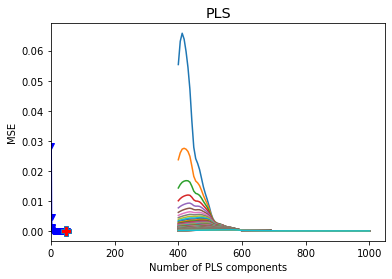

R2 calib:  1.0
R2 CV:  1.0
MAE calib:  1.2214864166433989e-11
MAE CV:  6.339384252205167e-11
MSE calib:  2.3213835300251485e-22
MSE CV:  7.610524584898154e-20


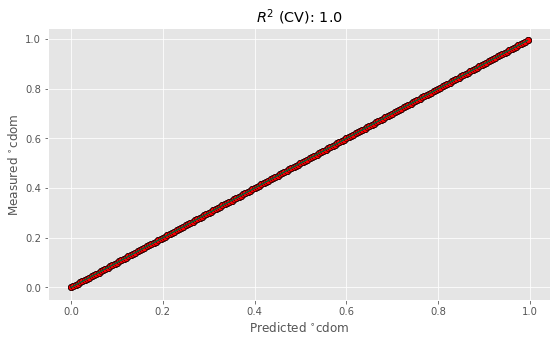



Choosen tsm value is  0.015625
100% completed
Suggested number of components:  45



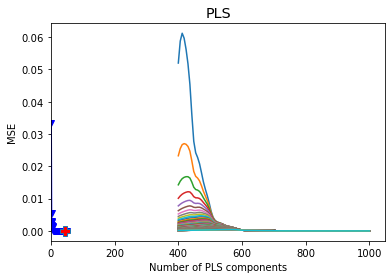

R2 calib:  1.0
R2 CV:  0.9999999999999982
MAE calib:  4.87149530244989e-11
MAE CV:  1.6775635113067171e-09
MSE calib:  3.68213303848637e-21
MSE CV:  1.4367456008463175e-16


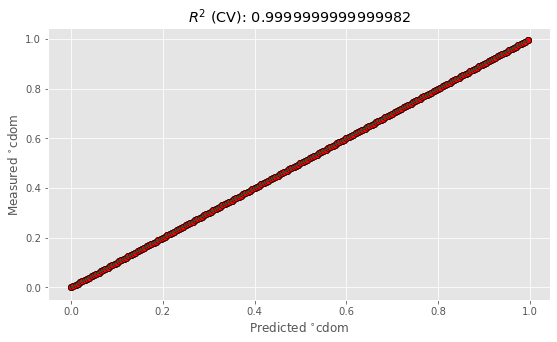



Choosen tsm value is  0.078125
100% completed
Suggested number of components:  49



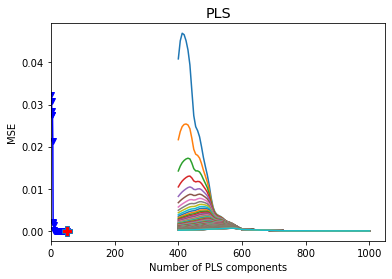

R2 calib:  1.0
R2 CV:  0.9999999999992204
MAE calib:  1.9713304961620387e-10
MAE CV:  6.355544545168604e-08
MSE calib:  7.500611622326551e-20
MSE CV:  6.496441847273262e-14


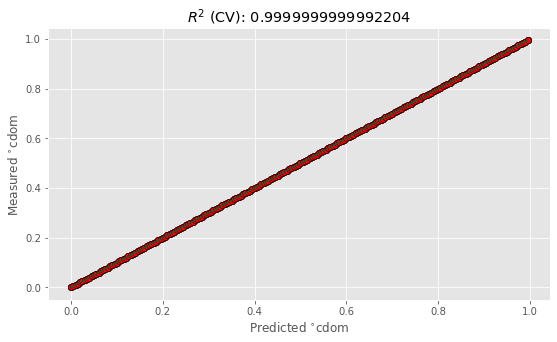



Choosen tsm value is  0.390625
100% completed
Suggested number of components:  49



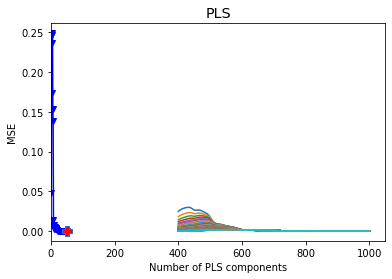

R2 calib:  0.9999999999999994
R2 CV:  0.9999999985716403
MAE calib:  3.0674800256269064e-09
MAE CV:  2.5623344864883407e-06
MSE calib:  4.2453834791858284e-17
MSE CV:  1.1902699320208965e-10


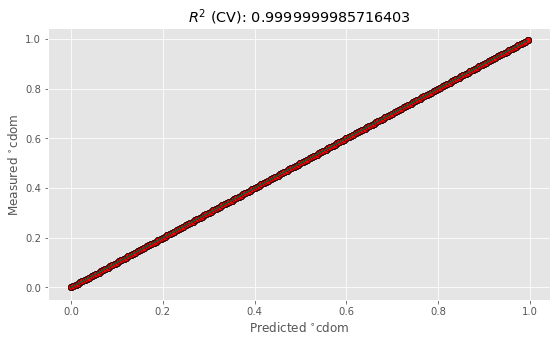



Choosen tsm value is  1.953125
100% completed
Suggested number of components:  48



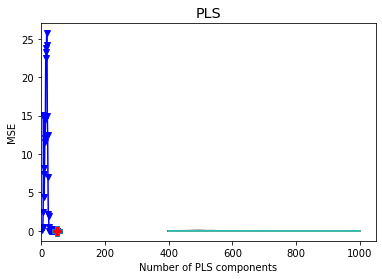

R2 calib:  0.9999999999999827
R2 CV:  0.9991148958520489
MAE calib:  2.4700920329322196e-08
MAE CV:  0.0024874427518478412
MSE calib:  1.439249632567609e-15
MSE CV:  7.375683502894916e-05


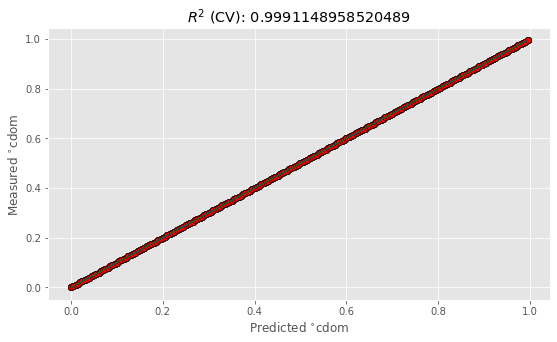

In [37]:
#!/usr/bin/env python
# coding=utf-8

# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

from scipy.interpolate import InterpolatedUnivariateSpline, Akima1DInterpolator
# ------------------------------------------------------------------------------


# ##############################################################################
class Hyperspectral(object):
    """docstring for Hyperspectral"""
# ------------------------------------------------------------------------------
    def __init__(self, wvl):
        super(Hyperspectral, self).__init__()
        self.wvl = wvl
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
    def _read_model_data(self, datafile):

        data = np.genfromtxt(datafile)
        return data[:, 0], data[:, 1]
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
    def _interp_data(self, wvl, data, extra_flag=True):
        """
        extra_flag is used to allow extrapolation with spline.
        """
        interpolator = Akima1DInterpolator(wvl, data)
        data_new = interpolator(self.wvl)
        if np.any(np.isnan(data_new)) and extra_flag:

            try:
                # Try to extrapolate just in using intial data
                extrapolator = InterpolatedUnivariateSpline(wvl, data)
            except:
                # if it's failed, the extrapolation is performed in using
                # interpolated data
                ind_not_nan = np.where(np.isnan(data_new)==False)
                extrapolator = InterpolatedUnivariateSpline(
                    self.wvl[ind_not_nan], data_new[ind_not_nan])

            ind_nan = np.where(np.isnan(data_new))
            data_new[ind_nan] = extrapolator(self.wvl[ind_nan])

        return data_new
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
    def resample(self, init_sp, wvl, fwhm):
        resamp_data = np.zeros(wvl.shape)
        dwvl = self.wvl[1] - self.wvl[0]
        for i_wvl in range(wvl.shape[0]):
            sigma = fwhm[i_wvl]/(2.*np.sqrt(2*np.log(2)))
            filter_coeff = 1./(sigma*np.sqrt(2*np.pi)) * \
                np.exp(-0.5*((self.wvl-wvl[i_wvl])**2)/(sigma**2))
            filter_coeff = filter_coeff*dwvl
            resamp_data[i_wvl] = np.inner(filter_coeff, init_sp)
        return resamp_data
# ------------------------------------------------------------------------------
# ##############################################################################


# ##############################################################################
class Water(Hyperspectral):
    """docstring for Water"""
# ------------------------------------------------------------------------------
    def __init__(self, wvl,
                 awater_file,
                 abwater, ebwater,
                 aphy_file, ephy_file,
                 anap, snap,
                 scdom,
                 abp, ebp, bfp):
        super(Water, self).__init__(wvl)
        # For water absorption
        wvl_awater, awater = self._read_model_data(awater_file)
        self.awater = self._interp_data(wvl_awater, awater)
        # For chlorophyl absorption
        wvl_aphy, aphy = self._read_model_data(aphy_file)
        wvl_ephy, ephy = self._read_model_data(ephy_file)
        self.aphy = self._interp_data(wvl_aphy, aphy)
        self.ephy = self._interp_data(wvl_ephy, ephy)
        self.aphy = np.maximum(self.aphy, 0.)
        self.ephy = np.maximum(self.ephy, 0.)
        # For non algal absorption
        self.anap = anap
        self.snap = snap
        # For cdom absorption
        self.scdom = scdom
        # For water scatterring
        self.bwater = self.get_bwater(abwater, ebwater)
        # For particles scattering
        self.bfp = bfp
        self.abp = abp
        self.ebp = ebp
# ------------------------------------------------------------------------------


# ------------------------------------------------------------------------------
    def get_aphy(self, chloro_conc):
        # concentation in mg/m3
        return self.aphy * (chloro_conc)**(self.ephy)
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
    def get_anap(self, tsm):
        # total suspended matter in g/m3
        return tsm * self.anap * np.exp(-self.snap * (self.wvl - 443.))
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
    def get_acdom(self, cdom_abs):
        # absorption in  m-1
        return cdom_abs * np.exp(-self.scdom * (self.wvl - 443.))
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
    def get_bwater(self, abwater, ebwater):
        return abwater * (self.wvl/500.)**(ebwater)
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
    def get_bp(self, tsm):
        # total suspended matter in g/m3
        return tsm * self.abp * (self.wvl/555.)**(self.ebp)
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
    def get_absorption(self, chloro_conc, cdom, tsm):
        return self.awater + self.get_aphy(chloro_conc) + \
            self.get_acdom(cdom) + self.get_anap(tsm)
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
    def get_total_scat(self, tsm):
        return self.bwater + self.get_bp(tsm)
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
    def get_back_scat(self, tsm):
        return 0.5*self.bwater + self.bfp * self.get_bp(tsm)
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
    def rrsm_inf(self, chl, cdom, tsm, thetaw, theta):
        # From Albert Mobley 2003
        # thetaw : subsurface solar zenith angle in radian
        # theta : subsurface viewing angle in radian

        p1, p2, p3, p4, p5, p6, p7 = \
            0.0512, 4.6659, -7.8387, 5.4571, 0.1098, -0.0044, 0.4021

        a = self.get_absorption(chl, cdom, tsm)
        bb = self.get_back_scat(tsm)

        u = bb/(a+bb)

        # Albert Mobley 2003[Eq. 9]
        return p1*(1+p2*u+p3*u**2+p4*u**3) * \
            (1+p5/np.cos(thetaw)) * (1+p6*u) * \
            (1+p7/np.cos(theta))*u
# ------------------------------------------------------------------------------
# ##############################################################################


if __name__ == '__main__':
    # For test
    import matplotlib.pyplot as plt

    r_inf_data = []


    wvl = np.linspace(400, 1000, 100)
    awater_file = "awater.txt"
    abwater = 0.00288 # can be fixed
    ebwater = -4.32 # can be fixed
    aphy_file = "aphys.txt"
    ephy_file = "ephys.txt"
    anap = 0.036
    snap = 0.0123
    scdom = 0.017 # change this variable and fix all other for now
    abp = 0.42
    ebp = -0.2
    bfp = 0.0183

    water_param = Water(wvl,
                        awater_file,
                        abwater, ebwater,
                        aphy_file, ephy_file,
                        anap, snap,
                        scdom,
                        abp, ebp, bfp)

    theta_v, theta_s = np.radians(0), np.radians(30)

    df = pd.DataFrame()  # Create an empty DataFrame

    tsm_val = 0.000001
    while tsm_val < 4 :
        
        for cdom_values in np.arange(0.0, 1.0, 0.005):
            
            r_inf_test = water_param.rrsm_inf(0, cdom_values, tsm_val, theta_s, theta_v)
            
            
            
        # Create a new DataFrame for each iteration
        
            iteration_df = pd.DataFrame({
            f'cdom_{cdom_values}': cdom_values,
            f'wvl_{cdom_values}': wvl,
            f'r_inf_test_{cdom_values}': r_inf_test
        })
            # Append the iteration DataFrame to the main DataFrame

            df = pd.concat([df, iteration_df], axis=1)

        # Plot the data for the current iteration
            plt.plot(wvl, r_inf_test, label='Line '+str(cdom_values))

    # Save the main DataFrame to CSV
        df.to_csv('graph_data_cdom.csv', index=False)
        
        new_data = pd.read_csv("graph_data_cdom.csv")
        data1 = pd.DataFrame()

        new_col = []
        i=0
        for column in new_data : 

            i+=1 

            if(i%3==0):

                data1 = pd.concat([data1 , new_data[column]] , axis=1)

            elif i%3==1 :
                new_col.append(new_data[column][1])
        
        data1 = data1.T
#         print(new_col)
#         print(data1)
        print()
        print()
        
        filter_data = savgol_filter(data1, 17, polyorder = 2,deriv=2)
        print("Choosen tsm value is " , tsm_val)
        optimise_pls_cv(filter_data,new_col,50, plot_components=True)
        
        
        
        tsm_val*=5
    

In [82]:
def noise_pls_cv(X, y, random_state = None):
 
    np.random.seed(random_state)
    n_comp = 100
    mse = []
    component = np.arange(1, n_comp)

    for i in component:
        pls = PLSRegression(n_components=i)


        y_cv = cross_val_predict(pls, X, y, cv=10)

        mse.append(mean_squared_error(y, y_cv))

        comp = 100*(i+1)/n_comp

        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")


    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")






    X_train = X
    Y_train = y
    # Randomly select indices for test data
    '''  generates test data by randomly selecting indices from the input data (X) using np.random.choice()
    replace=False argument ensures that the same index is not selected multiple times.
    np.random.normal() generates random numbers from a normal distribution with a mean of 0 (loc=0) and a
    standard deviation of 0.1 (scale=0.1). The size parameter is set to (len(test_indices), X.shape[1]) to match the
    shape of X_test, where X.shape[1] represents the number of columns (features) in X '''
    scale_values = [0.1 , 0.01 , 0.001,0.0001]
    for x in scale_values:
#       X_train = X + np.random.normal(loc=0, scale=x , size=(len(X), X.shape[1]))
#       Y_train = Y + np.random.normal(loc=0,scale=x)
      test_indices = np.random.choice(X.index, size=int(0.3 * len(X)), replace=False)
      X_train = X + np.random.normal(loc=0, scale=x , size=(len(X), X.shape[1]))
      X_test = X.loc[test_indices]
      Y_test = y.loc[test_indices]
#       X_test = X_train.loc[test_indices]
#       Y_test = Y_train.loc[test_indices] 

    
#       print(X_train)
#       print(X_test)
#       print(Y_train)
#       print(Y_test)
      rf = PLSRegression(n_components=msemin+1)
      rf.fit(X_train, Y_train)
    
      preds_train = rf.predict(X_train)  # predicted values for training data
      true_y_train = Y_train.to_numpy().flatten()
      error_rf_mse_train = mean_squared_error(true_y_train, preds_train)
      error_rf_abs_train = mean_absolute_error(true_y_train, preds_train)

      preds = rf.predict(X_test)  # predicted value
      true_y = Y_test.to_numpy().flatten()
      error_rf_mse = mean_squared_error(true_y, preds)
      error_rf_abs = mean_absolute_error(true_y, preds)

      print("For STD : ", x)
      print("\n Training set MSE: ", error_rf_mse_train)
      print("\n Training set MAE: ", error_rf_abs_train, "\n")

      print("\n Test set R-squared: ", rf.score(X_test, Y_test))
      print("\n Test set MSE: ", error_rf_mse)
      print("\n Test set MAE: ", error_rf_abs, "\n")


      # Plot true vs predicted values
      fig, ax = plt.subplots(figsize=(8, 8))
      ax.scatter(true_y, preds, color='blue', label='True vs Predicted')
      ax.plot([true_y.min(), true_y.max()], [true_y.min(), true_y.max()], color='red', linestyle='--', label='Ideal')
      ax.set_xlabel('True Values')
      ax.set_ylabel('Predicted Values')
      ax.legend()
      plt.show()
    
    
      accuracy= rf.score(X_test, Y_test)
      print("Accuracy: ", accuracy)



 
 

In [83]:
data = pd.read_csv("updated_dataset_for_cdom.csv")

In [84]:
data.head()

,cdom,wvl_400,wvl_406.060606060606,wvl_412.121212121212,wvl_418.181818181818,wvl_424.242424242424,wvl_430.30303030303,wvl_436.363636363636,wvl_442.424242424242,wvl_448.484848484848,...,wvl_945.454545454545,wvl_951.515151515151,wvl_957.575757575757,wvl_963.636363636363,wvl_969.696969696969,wvl_975.757575757575,wvl_981.818181818181,wvl_987.878787878787,wvl_993.939393939393,wvl_1000
0,0.000,0.056314,0.064316,0.067075,0.064996,0.060689,0.055129,0.047608,0.036917,0.027884,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08
1,0.005,0.023801,0.026113,0.027362,0.027621,0.027302,0.026501,0.024850,0.021576,0.018119,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08
2,0.010,0.014293,0.015436,0.016184,0.016562,0.016713,0.016650,0.016175,0.014827,0.013179,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08
3,0.015,0.010014,0.010721,0.011235,0.011571,0.011795,0.011908,0.011792,0.011151,0.010262,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08
4,0.020,0.007640,0.008134,0.008519,0.008803,0.009026,0.009184,0.009201,0.008876,0.008360,...,5.630000e-08,4.910000e-08,4.290000e-08,3.760000e-08,3.320000e-08,2.930000e-08,2.600000e-08,2.310000e-08,2.060000e-08,1.840000e-08


100% completed
Suggested number of components:  12

For STD :  0.1

 Training set MSE:  0.04574271568192159

 Training set MAE:  0.17132217439615471 


 Test set R-squared:  0.6118198573081387

 Test set MSE:  0.036768574074717474

 Test set MAE:  0.15584681932994476 



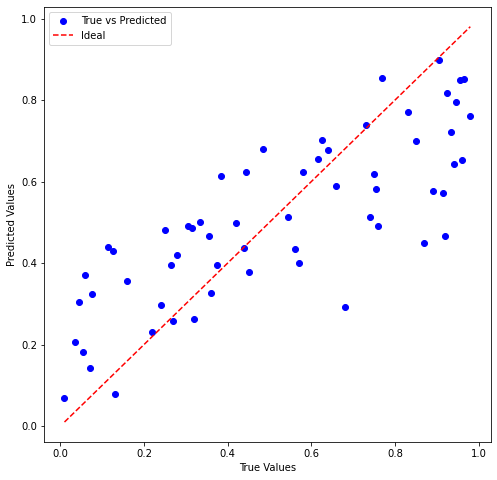

Accuracy:  0.6118198573081387
For STD :  0.01

 Training set MSE:  0.03719491616083028

 Training set MAE:  0.15781827961367081 


 Test set R-squared:  0.4629261199757355

 Test set MSE:  0.04025390735892224

 Test set MAE:  0.15596376420934793 



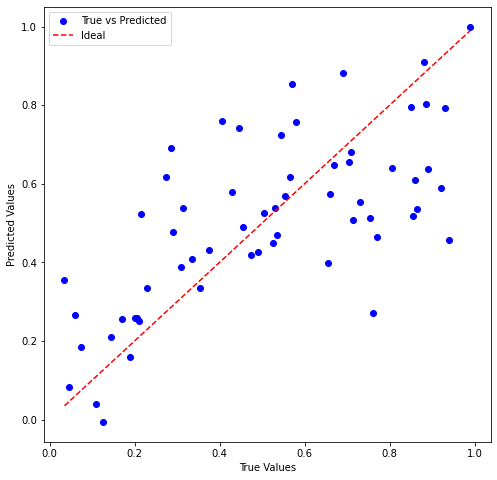

Accuracy:  0.4629261199757355
For STD :  0.001

 Training set MSE:  0.016077751599426593

 Training set MAE:  0.10296332926147266 


 Test set R-squared:  0.7819287898588914

 Test set MSE:  0.016321507920959804

 Test set MAE:  0.10346768631104147 



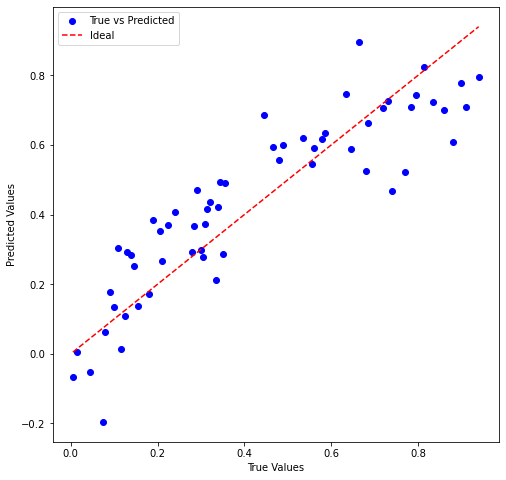

Accuracy:  0.7819287898588914
For STD :  0.0001

 Training set MSE:  0.0035612268667477814

 Training set MAE:  0.0489168037941845 


 Test set R-squared:  0.9557348254134383

 Test set MSE:  0.003922429031831909

 Test set MAE:  0.05315447993166327 



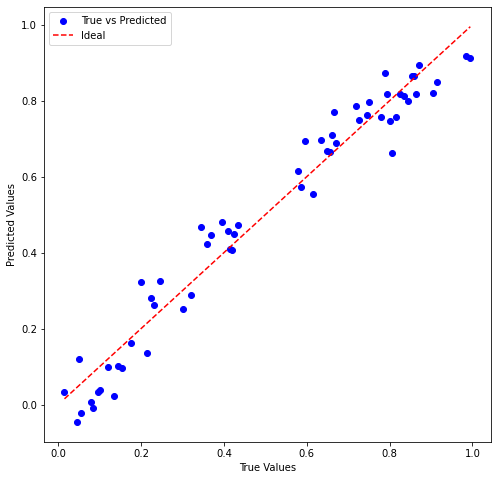

Accuracy:  0.9557348254134383


In [81]:
# previous when adding error to all training set
# but testing on orginial x 30% 

# Extract X (input features) and Y (target variable)
Y = data["cdom"]
X = data.drop('cdom' ,  axis = 1 )

# Call the function with X and Y as inputs and get the accuracy
accuracy = noise_pls_cv(X, Y, random_state=42)
# print("Accuracy: ", accuracy)

100% completed
Suggested number of components:  12

For STD :  0.1

 Training set MSE:  0.04931880140719688

 Training set MAE:  0.17759708988477343 


 Test set R-squared:  -0.003237576764868244

 Test set MSE:  0.07171256456328186

 Test set MAE:  0.2303868698084407 



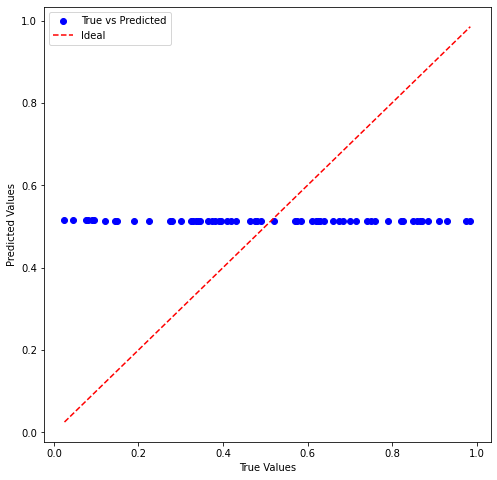

Accuracy:  -0.003237576764868244
For STD :  0.01

 Training set MSE:  0.032782223592974724

 Training set MAE:  0.14811740919196292 


 Test set R-squared:  0.10323991474245398

 Test set MSE:  0.07101076315369635

 Test set MAE:  0.2281879965603881 



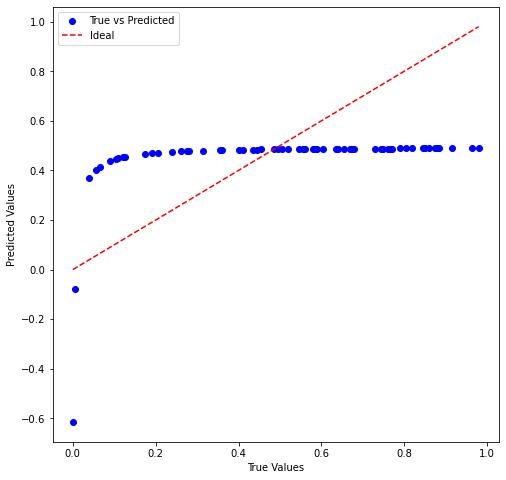

Accuracy:  0.10323991474245398
For STD :  0.001

 Training set MSE:  0.0194724635376699

 Training set MAE:  0.11021264911040955 


 Test set R-squared:  0.710339095408475

 Test set MSE:  0.023748058462478374

 Test set MAE:  0.1319363221173336 



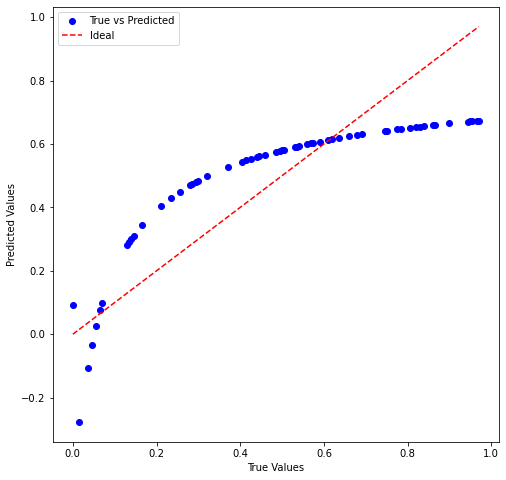

Accuracy:  0.710339095408475
For STD :  0.0001

 Training set MSE:  0.0035072837735099283

 Training set MAE:  0.04754808675081863 


 Test set R-squared:  0.9446679283997564

 Test set MSE:  0.0043660827785039534

 Test set MAE:  0.05755632170209758 



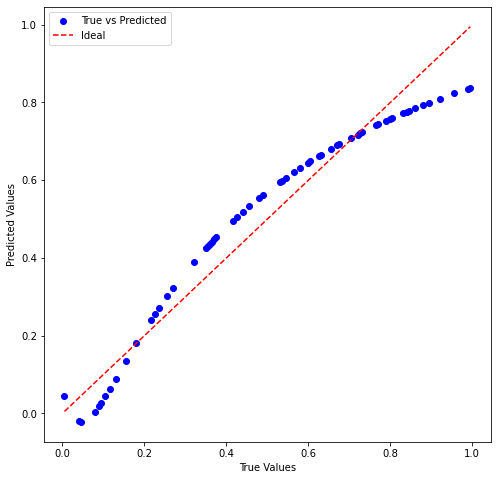

Accuracy:  0.9446679283997564


In [85]:


# Extract X (input features) and Y (target variable)
Y = data["cdom"]
X = data.drop('cdom' ,  axis = 1 )

# Call the function with X and Y as inputs and get the accuracy
accuracy = noise_pls_cv(X, Y, random_state=42)
# print("Accuracy: ", accuracy)

In [41]:
def noise_pls_cv1(X, y, random_state = None):
 
    np.random.seed(random_state)
    n_comp = 100
    mse = []
    component = np.arange(1, n_comp)

    for i in component:
        pls = PLSRegression(n_components=i)


        y_cv = cross_val_predict(pls, X, y, cv=10)

        mse.append(mean_squared_error(y, y_cv))

        comp = 100*(i+1)/n_comp

        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")


    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")






    X_train = X
    Y_train = y
    # Randomly select indices for test data
    '''  generates test data by randomly selecting indices from the input data (X) using np.random.choice()
    replace=False argument ensures that the same index is not selected multiple times.
    np.random.normal() generates random numbers from a normal distribution with a mean of 0 (loc=0) and a
    standard deviation of 0.1 (scale=0.1). The size parameter is set to (len(test_indices), X.shape[1]) to match the
    shape of X_test, where X.shape[1] represents the number of columns (features) in X '''
    scale_values = [0.1 , 0.01 , 0.001,0.0001]
    for x in scale_values:
      amp = np.random.rand()*np.pi
      noise = x * np.sin(amp)
      X_test = X*noise
      Y_test = Y_train
    
      rf = PLSRegression(n_components=msemin+1)
      rf.fit(X_train, Y_train)

      preds_train = rf.predict(X_train)  # predicted values for training data
      true_y_train = Y_train.to_numpy().flatten()
      error_rf_mse_train = mean_squared_error(true_y_train, preds_train)
      error_rf_abs_train = mean_absolute_error(true_y_train, preds_train)

      preds = rf.predict(X_test)  # predicted value
      true_y = Y_test.to_numpy().flatten()
      error_rf_mse = mean_squared_error(true_y, preds)
      error_rf_abs = mean_absolute_error(true_y, preds)

      print("For STD : ", x)
      print("\n Training set MSE: ", error_rf_mse_train)
      print("\n Training set MAE: ", error_rf_abs_train, "\n")

      print("\n Test set R-squared: ", rf.score(X_test, Y_test))
      print("\n Test set MSE: ", error_rf_mse)
      print("\n Test set MAE: ", error_rf_abs, "\n")


      # Plot true vs predicted values
      fig, ax = plt.subplots(figsize=(8, 8))
      ax.scatter(true_y, preds, color='blue', label='True vs Predicted')
      ax.plot([true_y.min(), true_y.max()], [true_y.min(), true_y.max()], color='red', linestyle='--', label='Ideal')
      ax.set_xlabel('True Values')
      ax.set_ylabel('Predicted Values')
      ax.legend()
      plt.show()
    
    
      accuracy = rf.score(X_test, Y_test)
      print("Accuracy: ", accuracy)



 
 

In [42]:
np.random.rand()*np.pi*2

0.980294029274052

100% completed
Suggested number of components:  12

For STD :  0.1

 Training set MSE:  3.988672606043183e-06

 Training set MAE:  0.0015978700389806628 


 Test set R-squared:  -1577.224979675601

 Test set MSE:  131.5154603375924

 Test set MAE:  11.465025352676884 



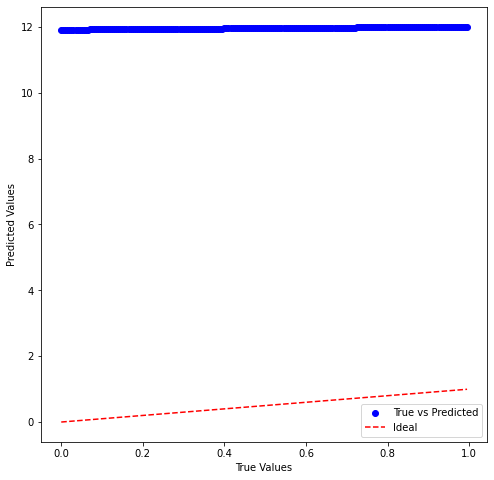

Accuracy:  -1577.224979675601
For STD :  0.01

 Training set MSE:  3.988672606043183e-06

 Training set MAE:  0.0015978700389806628 


 Test set R-squared:  -1908.7426797454007

 Test set MSE:  159.1412446815339

 Test set MAE:  12.611826602202791 



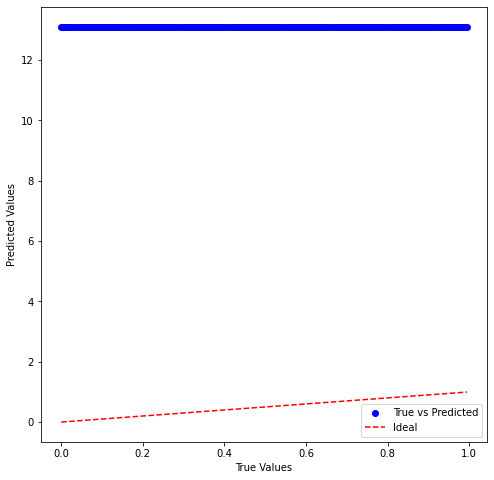

Accuracy:  -1908.7426797454007
For STD :  0.001

 Training set MSE:  3.988672606043183e-06

 Training set MAE:  0.0015978700389806628 


 Test set R-squared:  -1911.7897519168228

 Test set MSE:  159.3951610144187

 Test set MAE:  12.621883933653862 



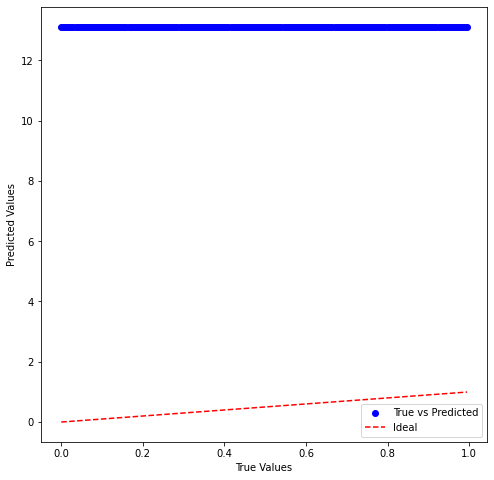

Accuracy:  -1911.7897519168228
For STD :  0.0001

 Training set MSE:  3.988672606043183e-06

 Training set MAE:  0.0015978700389806628 


 Test set R-squared:  -1914.2817977773452

 Test set MSE:  159.6028263110334

 Test set MAE:  12.630103361874284 



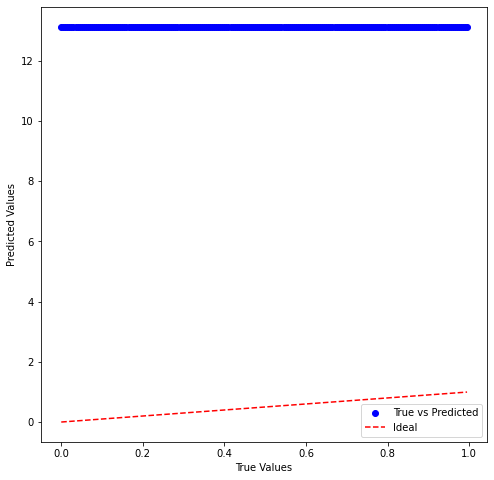

Accuracy:  -1914.2817977773452


In [43]:
# Extract X (input features) and Y (target variable)
Y = data["cdom"]
X = data.drop('cdom' ,  axis = 1 )

# Call the function with X and Y as inputs and get the accuracy
accuracy = noise_pls_cv1(X, Y, random_state=42)
# print("Accuracy: ", accuracy)

In [28]:
"""
Nonlinear Noise: Instead of adding Gaussian noise, you can introduce nonlinear noise patterns 
to simulate more complex data variations. This can be done by applying mathematical functions,
such as sine waves, polynomial functions, or other nonlinear transformations to your dataset.

Outliers: Introduce outliers to your dataset to simulate extreme or unexpected observations. 
Outliers can be generated by randomly selecting a subset of data points and modifying them to 
deviate significantly from the rest of the dataset.

Missing Values: Introduce missing values to simulate incomplete or unreliable data. This
can be done by randomly removing a certain percentage of values from your dataset or by 
systematically removing values based on specific criteria.

Heteroscedastic Noise: Consider adding noise with varying levels of variance across different
regions of your dataset. Heteroscedastic noise can be applied by assigning different variances
to different subsets of data points, reflecting the varying levels of uncertainty or noise in different parts of your data.

Correlated Noise: Introduce noise that is correlated with certain features or target 
variables. This can be achieved by generating noise values that are linearly or nonlinearly 
related to specific features or target variables in your dataset  """

'\nNonlinear Noise: Instead of adding Gaussian noise, you can introduce nonlinear noise patterns \nto simulate more complex data variations. This can be done by applying mathematical functions,\nsuch as sine waves, polynomial functions, or other nonlinear transformations to your dataset.\n\nOutliers: Introduce outliers to your dataset to simulate extreme or unexpected observations. \nOutliers can be generated by randomly selecting a subset of data points and modifying them to \ndeviate significantly from the rest of the dataset.\n\nMissing Values: Introduce missing values to simulate incomplete or unreliable data. This\ncan be done by randomly removing a certain percentage of values from your dataset or by \nsystematically removing values based on specific criteria.\n\nHeteroscedastic Noise: Consider adding noise with varying levels of variance across different\nregions of your dataset. Heteroscedastic noise can be applied by assigning different variances\nto different subsets of data 